In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/pollen-grain-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pollen-grain-image-classification


In [ ]:
# Remove this cell to use the path to the downloaded dataset
path ="/kaggle/input/pollen-grain-image-classification"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# READ THE DATA

from typing import Counter
import os
names= [name.replace(' ','_').split('_')[0] for name in os.listdir(path)]
classes = Counter(names)
print(classes)

Counter({'combretum': 35, 'faramea': 35, 'myrcia': 35, 'croton': 35, 'arecaceae': 35, 'senegalia': 35, 'syagrus': 35, 'qualea': 35, 'mabea': 35, 'tridax': 35, 'matayba': 35, 'schinus': 35, 'dipteryx': 35, 'arrabidaea': 35, 'eucalipto': 35, 'cecropia': 35, 'hyptis': 35, 'serjania': 35, 'chromolaena': 35, 'mimosa': 35, 'urochloa': 35, 'protium': 35, 'anadenanthera': 20})


In [ ]:
#total no of images
print("Number of images:",len(names))

Number of images: 790


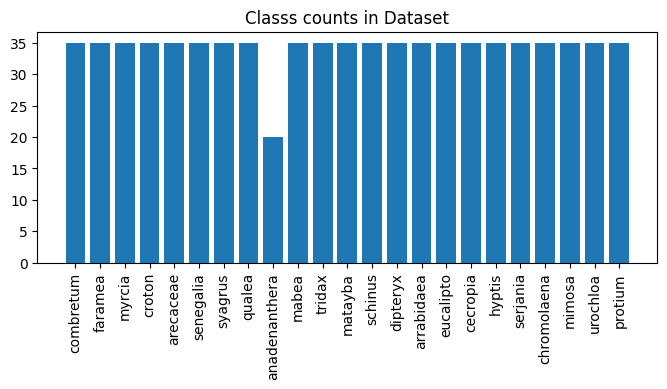

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,3))
plt.title('Classs counts in Dataset')
plt.bar(*zip(*classes.items()))
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
path_class={key:[] for key in classes.keys()}
for name in os.listdir(path):
  key= name.replace(' ','_').split('_')[0]
  path_class[key].append(os.path.join(path ,name))

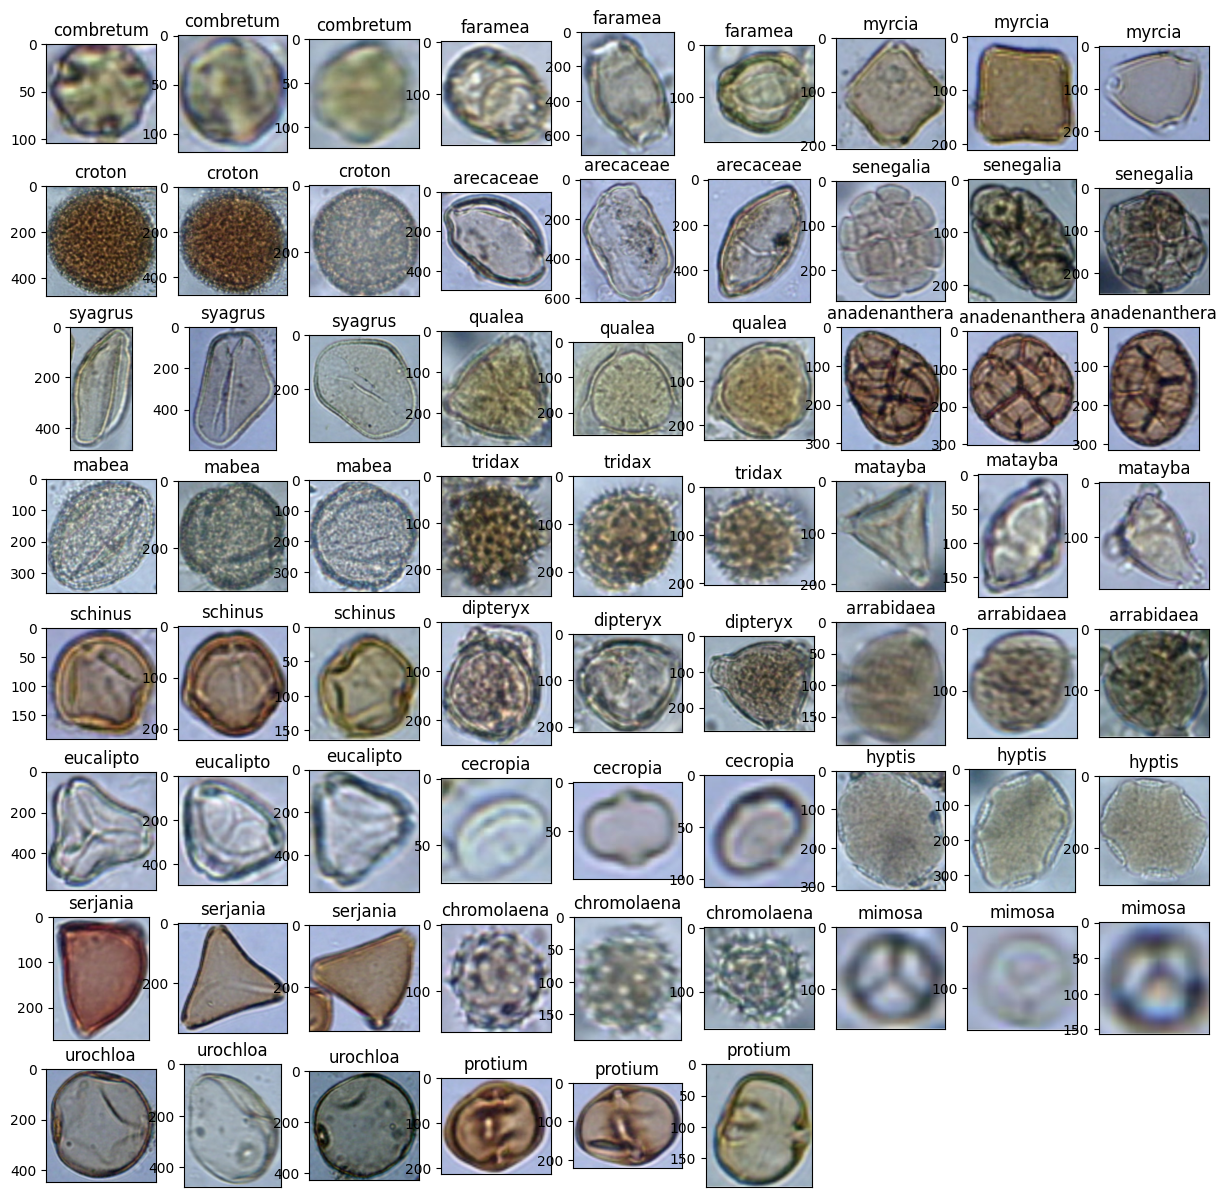

In [ ]:
from PIL import Image
fig = plt.figure(figsize=(15,15))
for i, key in enumerate(path_class.keys()):
  img1= Image.open(path_class[key][0])
  img2= Image.open(path_class[key][1])
  img3= Image.open(path_class[key][2])
  ax= fig.add_subplot(8,9, 3*i+1)
  ax.set_xticks([])
  ax.set_ytick=([])
  ax.imshow(img1)
  ax.set_title(key)
  ax= fig.add_subplot(8,9, 3*i+2)
  ax.set_xticks([])
  ax.set_ytick=([])
  ax.imshow(img2)
  ax.set_title(key)
  ax= fig.add_subplot(8,9, 3*i+3)
  ax.set_xticks([])
  ax.set_ytick=([])
  ax.imshow(img3)
  ax.set_title(key)

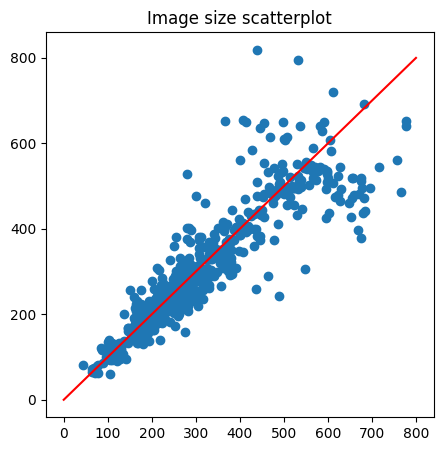

In [ ]:
!pip install opencv-python
import cv2
import os
size= [cv2.imread(os.path.join(path ,name)).shape for name in os.listdir(path)]
x,y,_= zip(*size)
fig =plt.figure(figsize=(5,5))
#scatter plot
plt.scatter(x,y)
plt.title("Image size scatterplot")
#add diagonal red line
plt.plot([0,800],[0,800],'r')
plt.show()

In [ ]:
#  IMAGE PRE-PROCESSING

import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

path="/kaggle/input/pollen-grain-image-classification"

def process_img (img,size =(128,128)):
    img=cv2.resize(img,size) # resize images
    img=img/255 # devide values to 255
    return img

# Read all images and put in x variable, y variable is class names

x,y =[],[]
for name in os.listdir(path):
  img_path = os.path.join(path, name)
  img = cv2.imread(img_path)
  if img is not None:
    x.append(process_img(img))
    y.append(name.replace(' ','_').split('_')[0])
  else:
    print(f"Warning: Could not read image file: {img_path}")

x = np.array(x)

le = LabelEncoder()
Y_le = le.fit_transform(y)
Y_cat = to_categorical(Y_le, 23)

In [ ]:
import cv2
def process_img (img,size =(128,128)):
    img=cv2.resize(img,size) # resize images
    img=img/255 # devide values to 255
    return img

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y_cat, test_size=0.285,stratify=Y_le)
print("Image in each class in Test set:{}".format(np.sum(Y_test, axis=0)))

Image in each class in Test set:[ 6. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10.]


In [ ]:
# TRAINING THE MODEL

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape=X_train.shape[1:]
output_shape=23
model =Sequential()
model.add(Conv2D(filters=16, kernel_size=3, input_shape=input_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(output_shape, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     4,096,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        75,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │         3,473 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,218,803 (16.09 MB)

 Trainable params: 4,218,803 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is Compiled!')

Model is Compiled!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagener =ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,)
# fit data generator
datagener.fit(X_train)

In [24]:
    # TRAINING THE MODEL

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size=4
epochs= 500
model_path='cnn.keras'
callbecks= [EarlyStopping(monitor ='val_loss', patience=20),
            ModelCheckpoint(filepath=model_path, save_best_only=True)]
history = model.fit(
    datagener.flow(X_train, Y_train, batch_size=batch_size),
    batch_size=batch_size,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_train, Y_train),
    callbacks=callbecks,
    verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - accuracy: 0.0209 - loss: 3.1696 - val_accuracy: 0.0443 - val_loss: 3.1319
Epoch 2/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 40s 170ms/step - accuracy: 0.0437 - loss: 3.1252 - val_accuracy: 0.1082 - val_loss: 2.8655
Epoch 3/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 41s 170ms/step - accuracy: 0.1120 - loss: 2.8883 - val_accuracy: 0.1436 - val_loss: 2.6134
Epoch 4/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 168ms/step - accuracy: 0.1077 - loss: 2.7514 - val_accuracy: 0.1755 - val_loss: 2.5330
Epoch 5/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step - accuracy: 0.1111 - loss: 2.5835 - val_accuracy: 0.2074 - val_loss: 2.3843
Epoch 6/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 23s 165ms/step - accuracy: 0.1754 - loss: 2.5301 - val_accuracy: 0.2039 - val_loss: 2.2911
Epoch 7/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 154ms/step - accuracy: 0.2075 - loss: 2.5130 - val_accuracy: 0.1418 - val_loss: 2.3695
Epoch 8/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 168ms/step - accuracy: 0.1627 -

In [25]:
model.load_weights(model_path)
score=model.evaluate(X_test,Y_test, verbose=0)
print('Test set accuracy: {}'. format(score[1]))

Test set accuracy: 0.8716813921928406


In [26]:
model.save("model.h5")

In [28]:
# test the model

from keras.utils import load_img, img_to_array
import numpy as np
import os

# Construct the correct path to the image file
image_path = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'data', 'urochloa (35).jpg')

# Check if the file exists before attempting to load
if os.path.exists(image_path):
    img = load_img(image_path, target_size=(128, 128))
    img = img.resize((128, 128))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    a = np.argmax(model.predict(x), axis=1)

    # Assuming 'op' contains the class names in the correct order
    # You might need to define 'op' or 'class_names' based on how you encoded your labels
    # For now, I'll use a placeholder or the previously defined 'class_names' if available
    # If 'op' is defined in another cell, make sure that cell is executed before this one.
    try:
        # Using 'op' if it's defined
        result = op[a[0]]
        print(f"Predicted class: {result}")
    except NameError:
        # Using a generic message if 'op' is not defined
        print(f"Predicted class index: {a[0]}")
        print("Please define 'op' or 'class_names' with your class labels to get the class name.")

else:
    print(f"Error: Image file not found at {image_path}")

Error: Image file not found at drive/MyDrive/Colab Notebooks/data/urochloa (35).jpg


In [30]:
from keras.utils import load_img, img_to_array
import numpy as np
import os

# Define the full list of class names based on the dataset
op = ['arecaceae', 'anadenanthera', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipteryx', 'eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']

# Load image and resize (using a sample image path - update this if needed)
# Make sure the image path is correct for an image in your Google Drive
image_path = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'data', 'urochloa (35).jpg') # Example path, update as needed

if os.path.exists(image_path):
    img = load_img(image_path, target_size=(128, 128))
    img = img.resize((128, 128))

    # convert to array and preprocess
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Predict
    a = np.argmax(model.predict(x), axis=1)

    # Get the predicted class name
    result = op[a[0]]
    print(f"Predicted class: {result}")
else:
    print(f"Error: Image file not found at {image_path}")

Error: Image file not found at drive/MyDrive/Colab Notebooks/data/urochloa (35).jpg


In [32]:
from keras.utils import load_img, img_to_array
import numpy as np
import os

# Define the full list of class names based on the dataset
op = ['arecaceae', 'anadenanthera', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipteryx', 'eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']

# Load image and resize
image_path = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'data', 'eucalipto_23.jpg') # Example path, update as needed

if os.path.exists(image_path):
    img = load_img(image_path, target_size=(128, 128))
    img = img.resize((128, 128))

    # convert to array and preprocess
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Predict
    a = np.argmax(model.predict(x), axis=1)

    # Get the predicted class name
    result = op[a[0]]
    print(f"Predicted class: {result}")
else:
    print(f"Error: Image file not found at {image_path}")

Error: Image file not found at drive/MyDrive/Colab Notebooks/data/eucalipto_23.jpg


In [34]:
# load image and resize
from keras.utils import load_img, img_to_array
import numpy as np
import os

# Define the full list of class names based on the dataset
class_names = ['arecaceae','anadenanthera','arrabidaea','cecropia','chromolaena','combretum','croton','dipteryx','eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']

image_path = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'data', 'anadenanthera_16.jpg')

if os.path.exists(image_path):
    img = load_img(image_path, target_size=(128,128))
    img = img.resize((128,128))

    # convert to array and preprocess
    x=img_to_array(img)
    x=np.expand_dims(x,axis=0)

    # Predict
    y_pred= model.predict(x)
    class_idx=np.argmax(y_pred,axis=1)[0]
    class_name= class_names[class_idx]
    print("Predicted class index:", class_idx)
    print("Predicted class name:", class_name)
else:
    print(f"Error: Image file not found at {image_path}")

Error: Image file not found at drive/MyDrive/Colab Notebooks/data/anadenanthera_16.jpg


In [36]:
# load image and resize
from keras.utils import load_img, img_to_array
import numpy as np
import os

# Define the full list of class names based on the dataset
class_names = ['arecaceae','anadenanthera','arrabidaea','cecropia','chromolaena','combretum','croton','dipteryx','eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']

image_path = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'data', 'croton_23.jpg')

if os.path.exists(image_path):
    img = load_img(image_path, target_size=(128,128))
    img = img.resize((128,128))

    # convert to array and preprocess
    x=img_to_array(img)
    x=np.expand_dims(x,axis=0)

    # Predict
    y_pred= model.predict(x)
    class_idx=np.argmax(y_pred,axis=1)[0]
    class_name= class_names[class_idx]
    print("Predicted class index:", class_idx)
    print("Predicted class name:", class_name)
else:
    print(f"Error: Image file not found at {image_path}")

Error: Image file not found at drive/MyDrive/Colab Notebooks/data/croton_23.jpg


In [38]:
# load image and resize
from keras.utils import load_img, img_to_array
import numpy as np
import os

# Define the full list of class names based on the dataset
class_names = ['arecaceae','anadenanthera','arrabidaea','cecropia','chromolaena','combretum','croton','dipteryx','eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']

image_path = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'data', 'hyptis_23.jpg')

if os.path.exists(image_path):
    img = load_img(image_path, target_size=(128,128))
    img = img.resize((128,128))

    # convert to array and preprocess
    x=img_to_array(img)
    x=np.expand_dims(x,axis=0)

    # Predict
    y_pred= model.predict(x)
    class_idx=np.argmax(y_pred,axis=1)[0]
    class_name= class_names[class_idx]
    print("Predicted class index:", class_idx)
    print("Predicted class name:", class_name)
else:
    print(f"Error: Image file not found at {image_path}")

Error: Image file not found at drive/MyDrive/Colab Notebooks/data/hyptis_23.jpg
